@author: Ayush Yembarwar  
@date: June 2019


We start by importing the required libraries.

In [ ]:
import sys
!{sys.executable} -m pip install -U dwave-qbsolv --user
!{sys.executable} -m pip install -U dwave-neal --user

In [35]:
location2 = 'D:\P.N.I.A\Forms\PyData Pune - Lightning Talk'
name2 = 'Sudoku_solved.png'

In [1]:
import numpy as np
from dwave_qbsolv import QBSolv
import dwave_qbsolv
import dimod
import seaborn as sns
import matplotlib.image as img 
import matplotlib.pyplot as plt 
sns.set_style("dark")
%matplotlib inline

#path = 'D:/P.N.I.A/Project - Paper Ideas/Projects/Full Blown Projects/SudoQ/'
path = 'C:/Users/Ayush/PNIA Codes/PS Time Codes/'
inf = 5


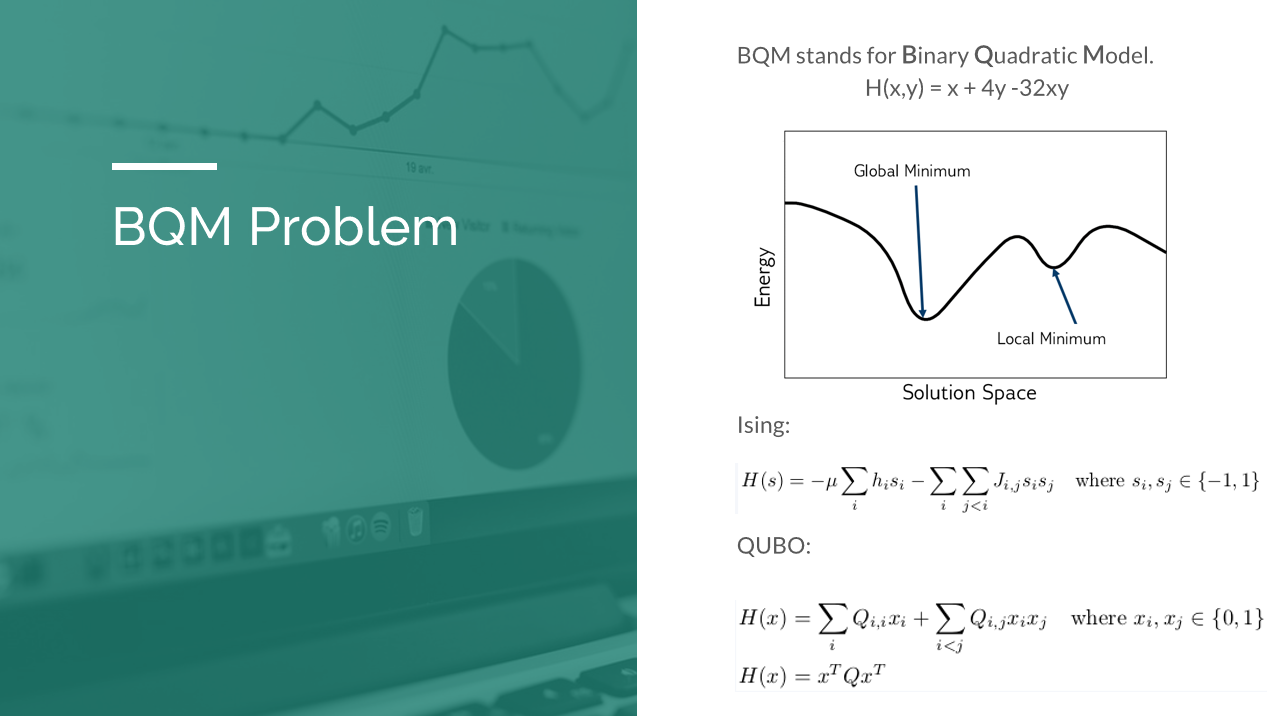

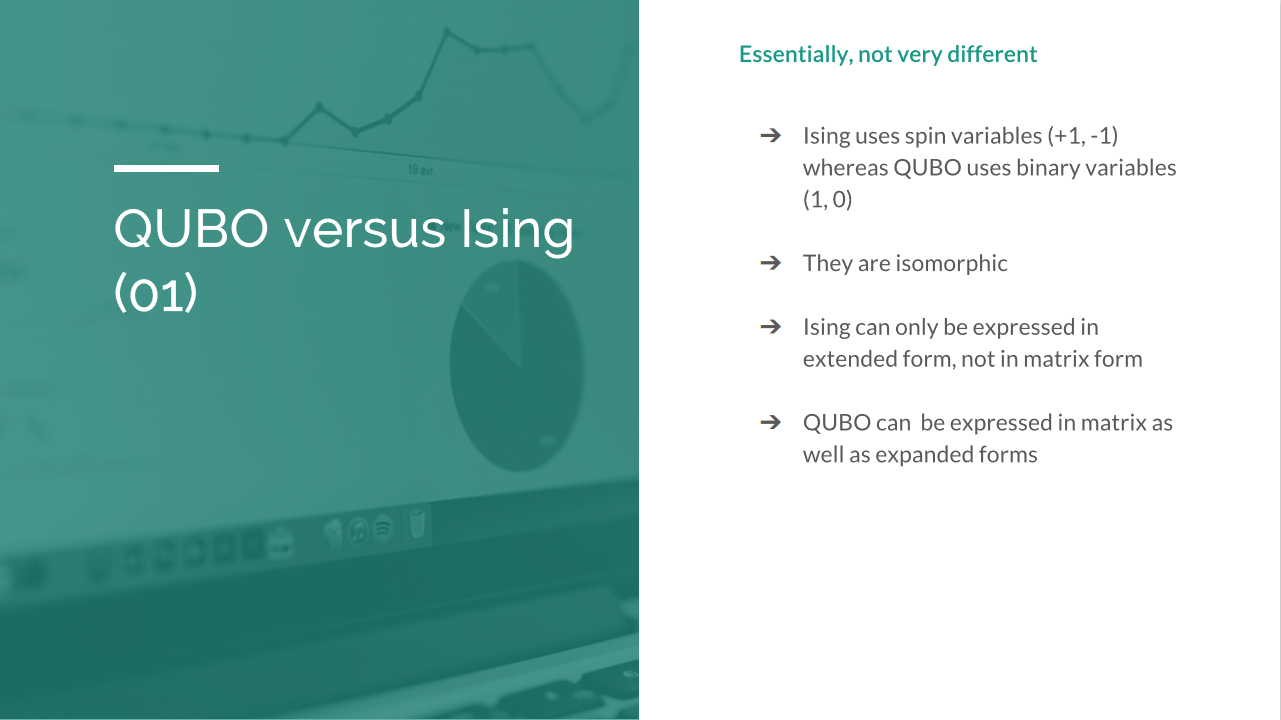

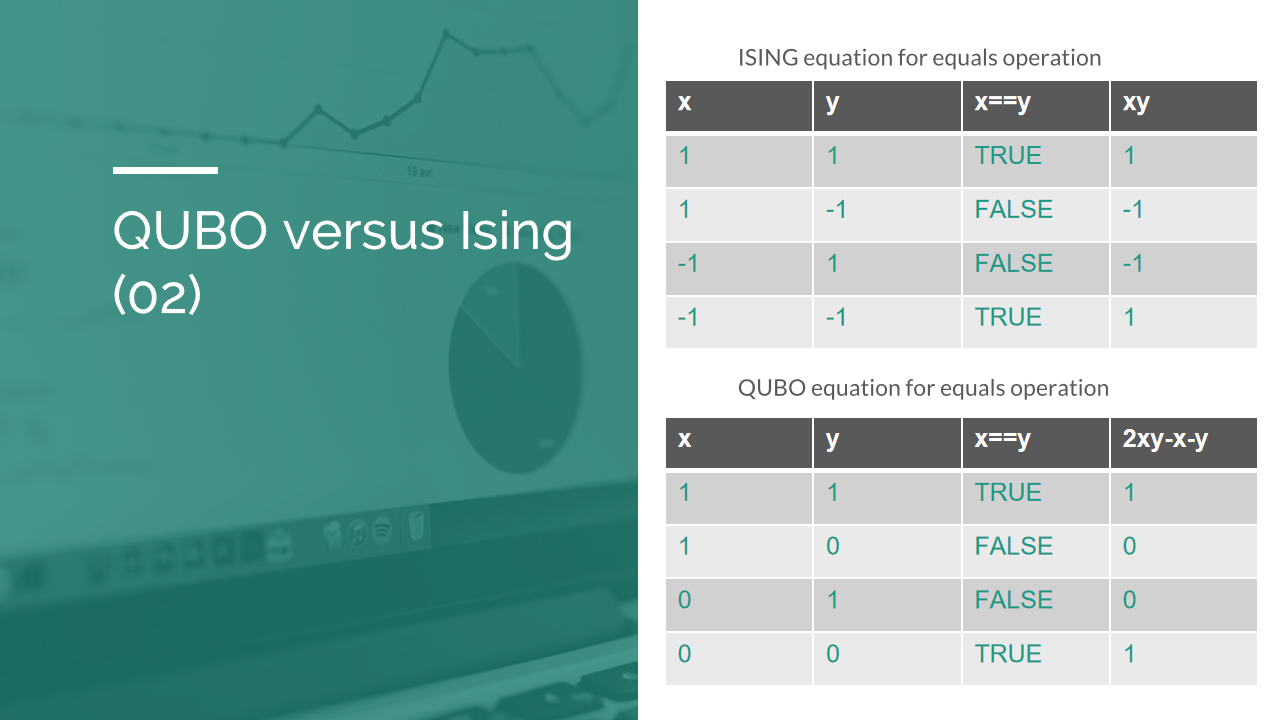

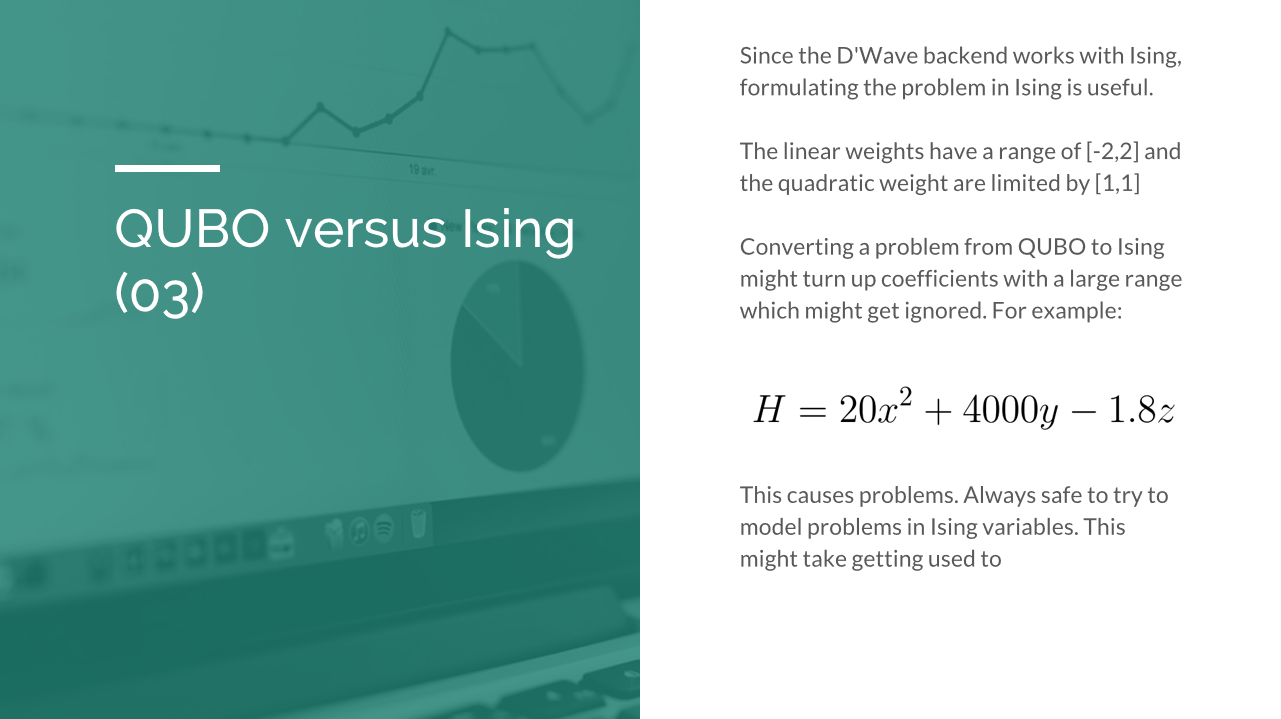

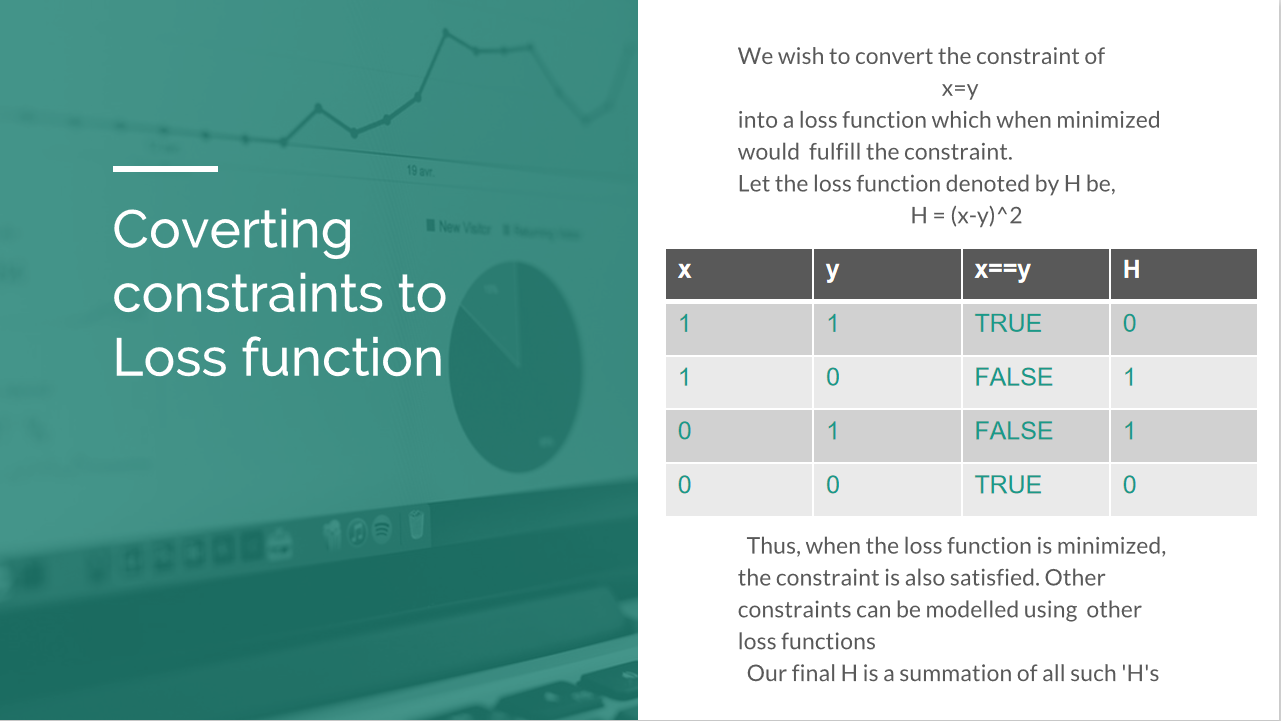

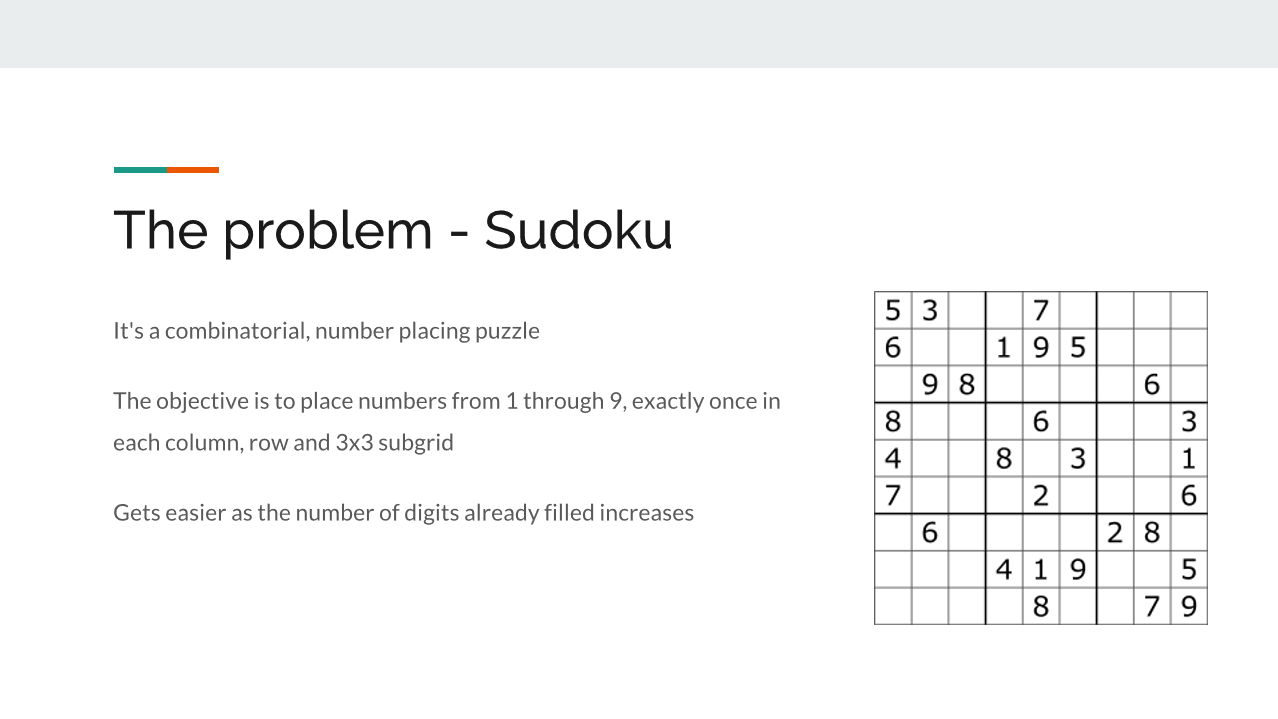

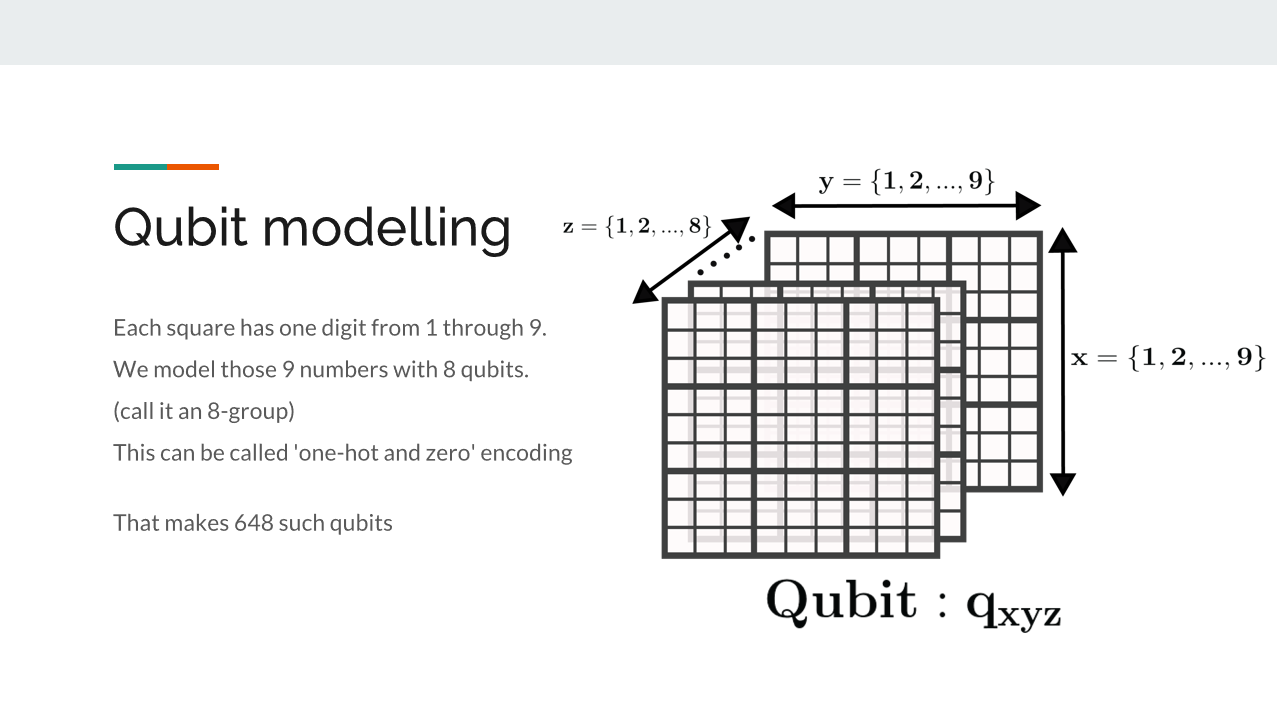

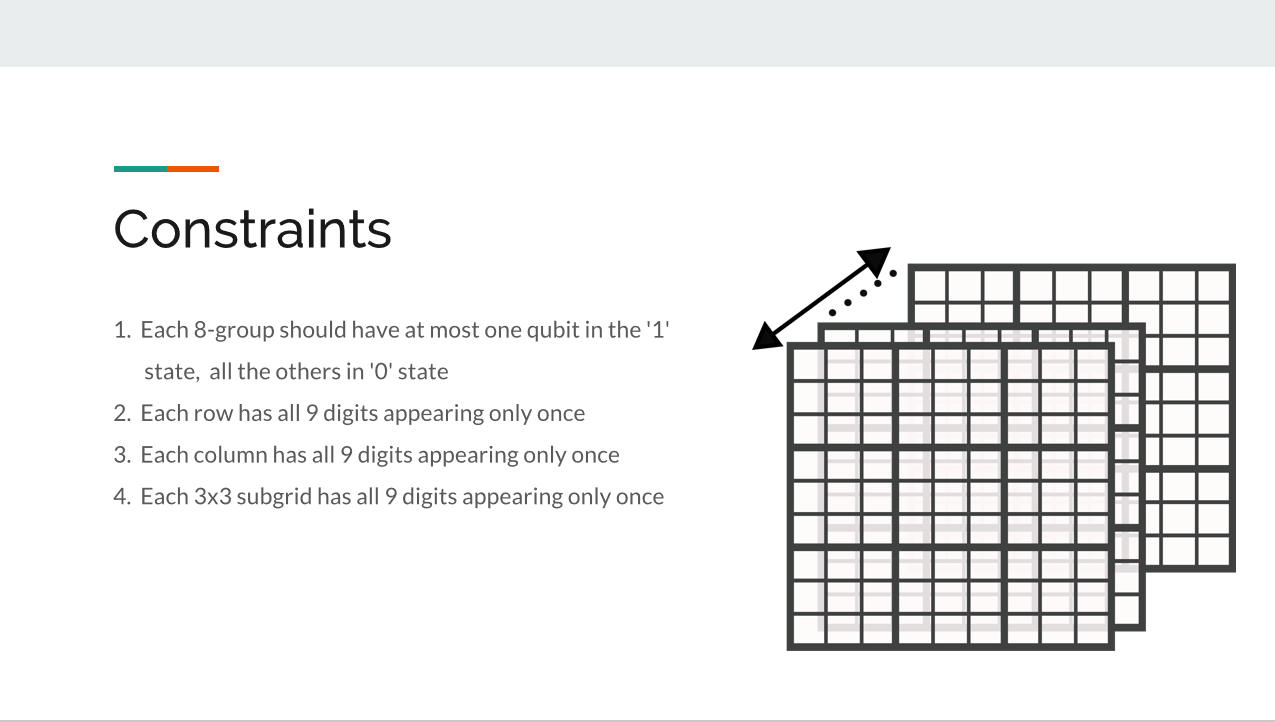

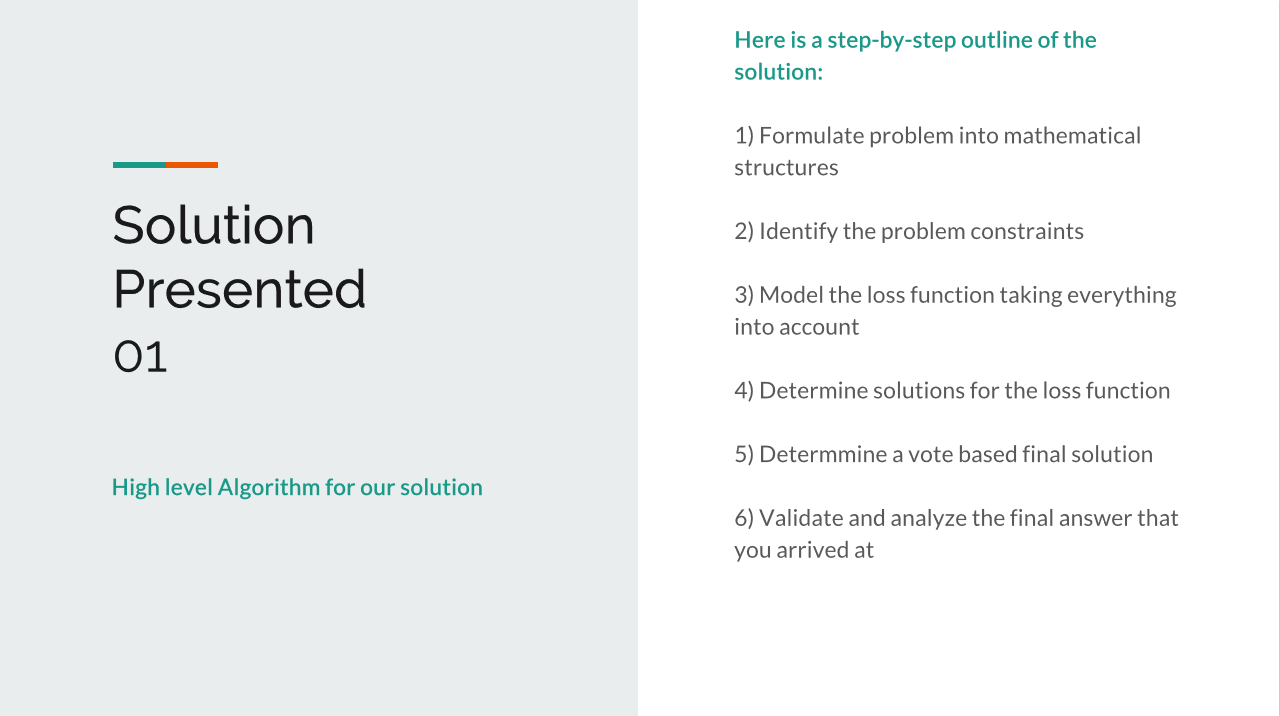

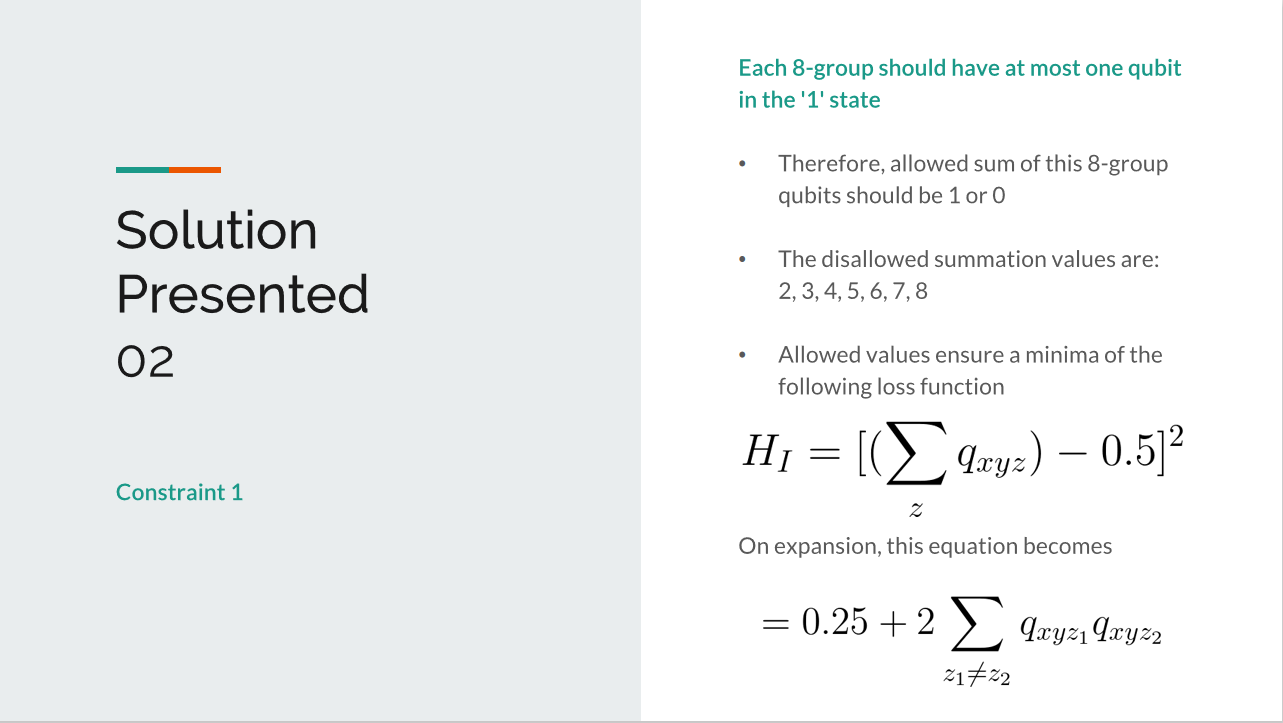

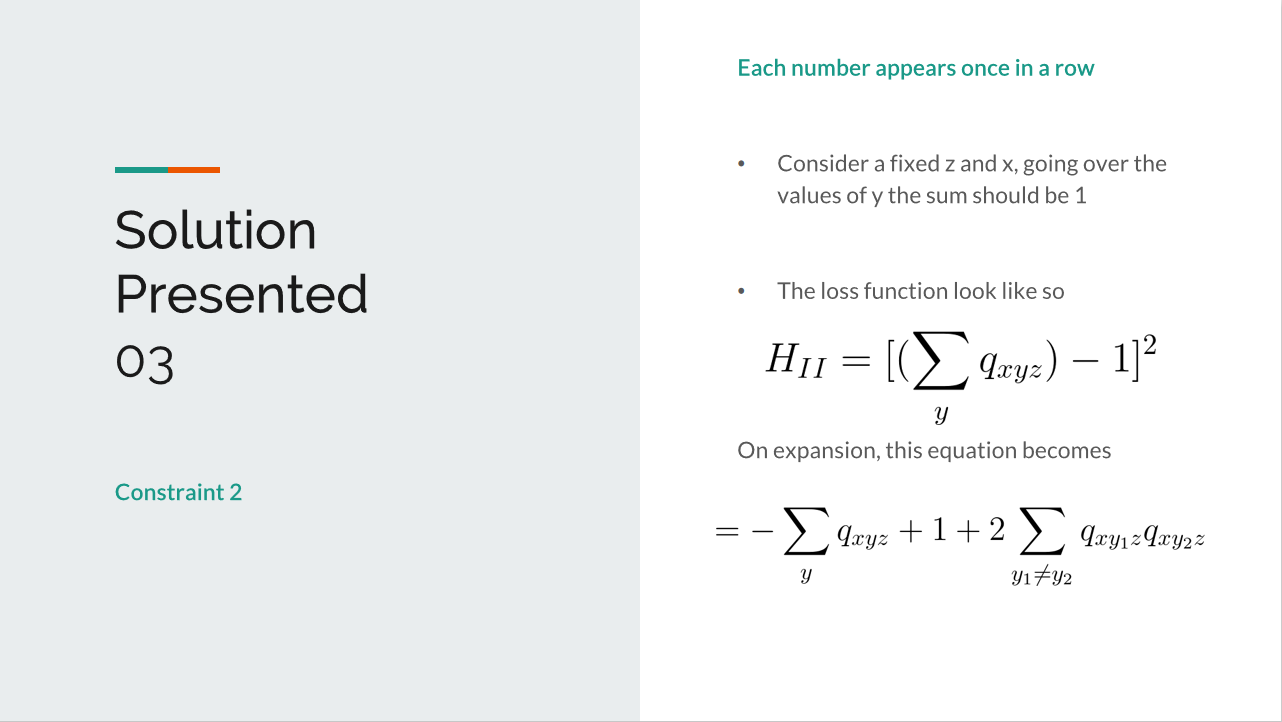

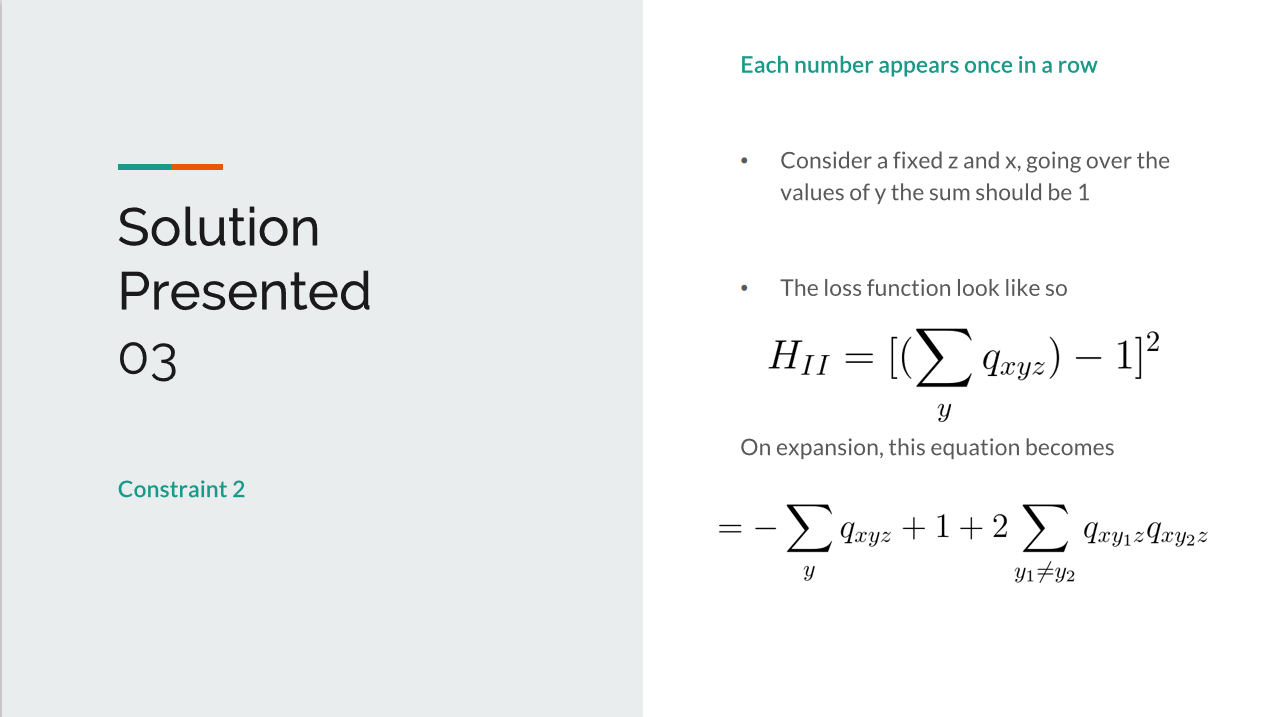

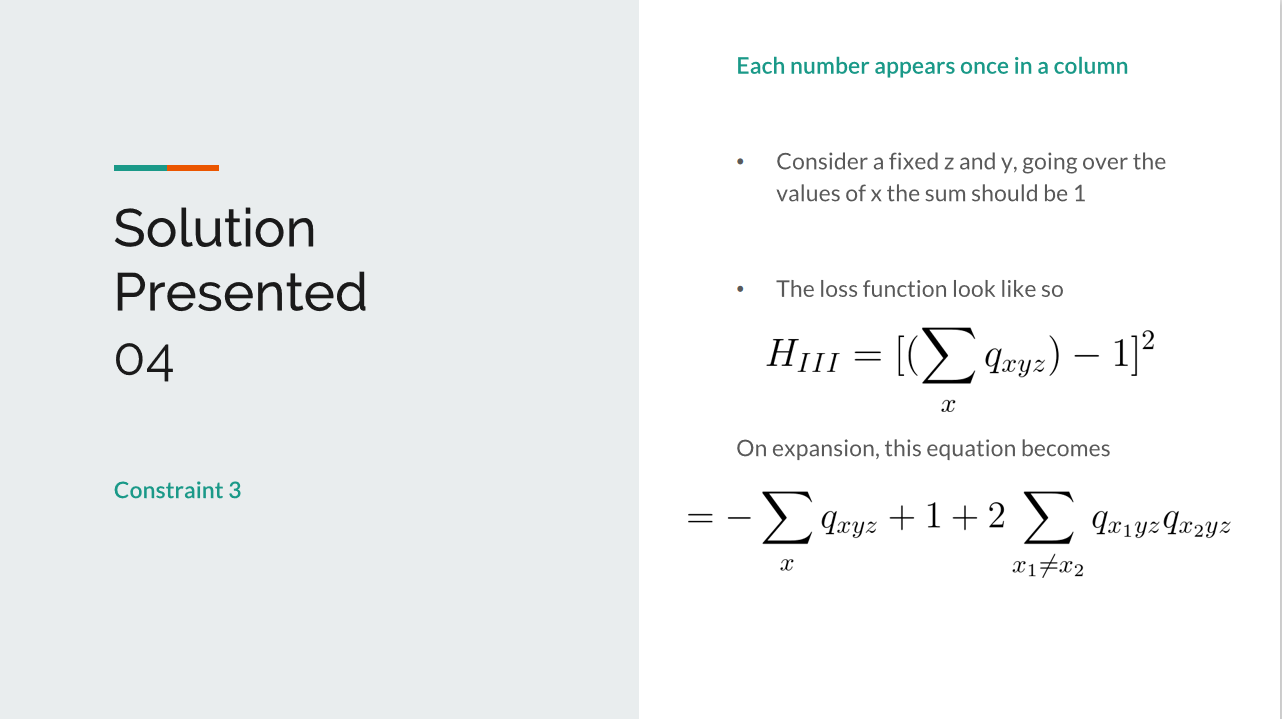

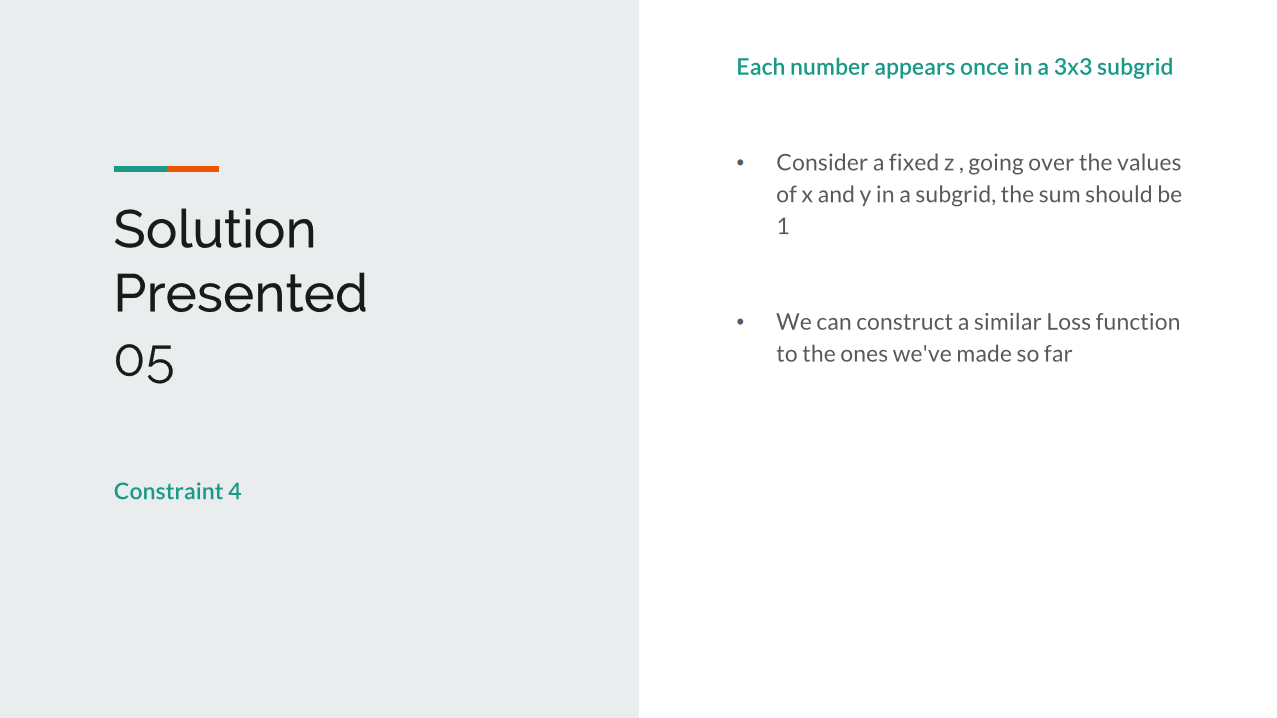

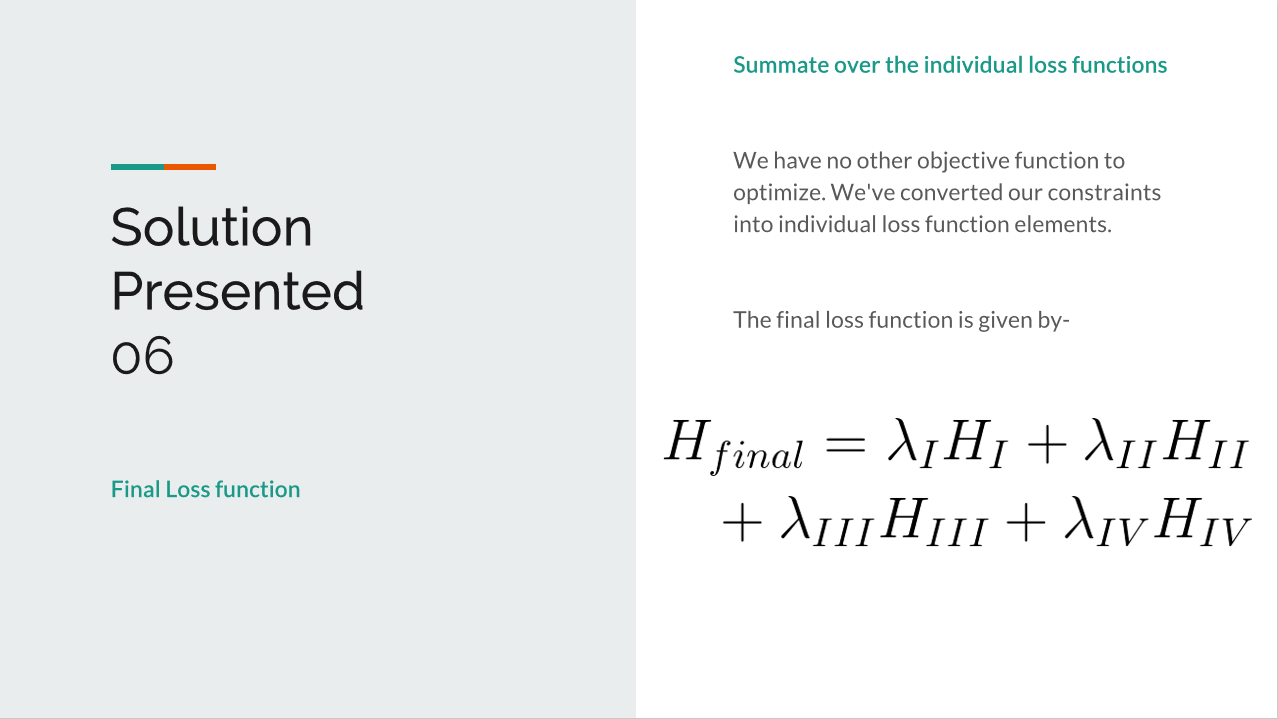

In [3]:
# For uniquely identifying a qubit number from (x,y,z)

def unique_id(x, y, z ):
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    ids = z + 8*((9*y) + x)
    
    return np.asarray(ids, dtype=np.int16)


In [4]:
# For uniquely identifying (x,y,z) from qubit unique_id

def xyz_from_id(ids, as_tuple = False):
    ids = np.asarray(ids)
    z = np.remainder(ids, 8)
    ids = np.subtract(ids, z)
    ids = np.divide(ids, 8)
    x = np.remainder(ids, 9)
    ids = np.subtract(ids, x)
    y = np.divide(ids, 9)
    
    if as_tuple:
        return (x, y, z)
    else:
        return x, y, z

In [5]:
# For adding values to the QUBO Matrix

def Q_add(Q, ids1, ids2, add_value ):
    Q = np.asarray(Q)
    ids1 = np.asarray(ids1)
    ids2 = np.asarray(ids2)
    Q_added = np.zeros((648,648), dtype = np.int32)
    try:
        for _ in range(len(ids1)):
            Q_added[ids1[_] ][ids2[_] ] = add_value
        np.add(Q, Q_added, out = Q)
    except TypeError:
        Q_added[ids1][ids2] = add_value
        np.add(Q, Q_added, out = Q)
    return Q


In [6]:
# Checking if QUBO Matrix 'Q' still is an upper triangular matrix

def upper_triangular_check(Q):
    number_qubits = np.shape(Q)[0]
    for __ in range(number_qubits):
        for _ in range(__):
            if Q[__][_] != 0 or Q[__][_] != 0.0:
                print("Q is an upper triangular matrix: False")
                return
    print("Q is an upper triangular matrix: True")
    

In [7]:
# Evaluate the QUBO Q Matrix

def evaluate(Q):
    print("The summation of QUBO Q Matrix elements is: " , np.sum(Q)); print()
    print("The QUBO Matrix: "); print(Q); print()
    upper_triangular_check(Q); print()
    sns.heatmap(data = Q)

In [8]:
# Extract solution from qbsolv returned qubit values

def extract_solution(solution):
    Solution = {}
    

In [9]:
Q = np.zeros((648,648), dtype = np.int32)

In [10]:
# For Equation I

for x_index in range(9):
    for y_index in range(9):
        for z_index1 in range(8):
            z2 = np.arange(z_index1 + 1, 8)
            z1 = np.empty((len(z2))); z1.fill(z_index1)
            x  = np.empty((len(z2))); x.fill(x_index)
            y  = np.empty((len(z2))); y.fill(y_index)
            
            ids1 = unique_id(x, y, z1 )
            ids2 = unique_id(x, y, z2 )
        
            Q_add(Q, ids1, ids2, add_value = 2)
            

The summation of QUBO Q Matrix elements is:  4536

The QUBO Matrix: 
[[0 2 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]]

Q is an upper triangular matrix: True



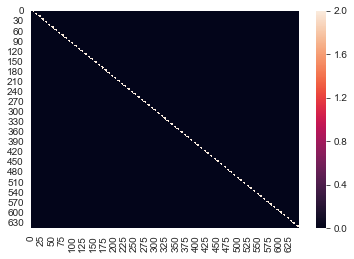

In [11]:
evaluate(Q)

In [12]:
# For Equation IIa

for z_index in range(8):
    for y_index in range(9):
        for x_index1 in range(9):
            x2 = np.arange(x_index1 + 1, 9)
            x1 = np.empty((len(x2))); x1.fill(x_index1)
            y  = np.empty((len(x2))); y.fill(y_index)
            z  = np.empty((len(x2))); z.fill(z_index)
            
            ids1 = unique_id(x1, y, z )
            ids2 = unique_id(x2, y, z )
        
            Q_add(Q, ids1, ids2, add_value =  2)   # Off-diagonal elements
            Q_add(Q, ids1, ids1, add_value = -1)   # Diagonal elements
            

The summation of QUBO Q Matrix elements is:  9144

The QUBO Matrix: 
[[-1  2  2 ...  0  0  0]
 [ 0 -1  2 ...  0  0  0]
 [ 0  0 -1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  2  2]
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  0]]

Q is an upper triangular matrix: True



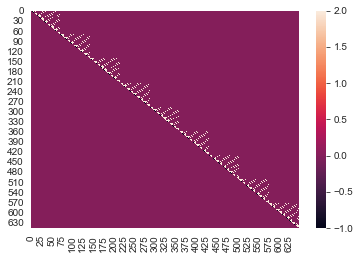

In [13]:
evaluate(Q)

In [14]:
# For Equation IIb

for z_index in range(8):
    for x_index in range(9):
        for y_index1 in range(9):
            y2 = np.arange(y_index1 + 1, 9)
            y1 = np.empty((len(y2))); y1.fill(y_index1)
            x  = np.empty((len(y2))); x.fill(x_index)
            z  = np.empty((len(y2))); z.fill(z_index)
            
            ids1 = unique_id(x, y1, z )
            ids2 = unique_id(x, y2, z )
        
            Q_add(Q, ids1, ids2, add_value =  2)   # Off-diagonal elements
            Q_add(Q, ids1, ids1, add_value = -1)   # Diagonal elements
            

The summation of QUBO Q Matrix elements is:  13752

The QUBO Matrix: 
[[-2  2  2 ...  0  0  0]
 [ 0 -2  2 ...  0  0  0]
 [ 0  0 -2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  2  2]
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  0]]

Q is an upper triangular matrix: True



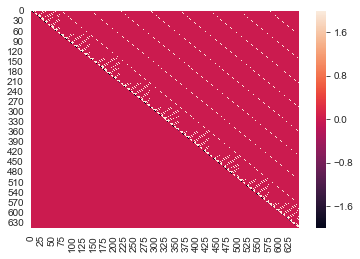

In [15]:
evaluate(Q)

In [16]:
# For Equation III

for z_index in range(8):
    for block_x in range(3):
        for block_y in range(3):
            x = []; y = []; z = []; ids_diagonal = []; ids_off_diagonal = []
            for cell_x in range(3):
                for cell_y in range(3):
                    
                    x.append((3*block_x) + cell_x)
                    y.append((3*block_y) + cell_y)
                    z.append(z_index)
                    
            ids = unique_id(x, y, z)
            
                    
            # For on-diagonal elements
            for _ in range(len(ids)):
                for temp in enumerate(ids[_ + 0:_ + 1], ):
                    ids_diagonal.append([ids[_], temp[1]])
            ids_diagonal = np.asarray(ids_diagonal)
            
                    
            # For off-diagonal elements
            for _ in range(len(ids)):
                for temp in enumerate(ids[_ + 1 :], ):
                    ids_off_diagonal.append((ids[_], temp[1]))
            ids_off_diagonal = np.asarray(ids_off_diagonal)
            
            
            # Making changes to the QUBO Matrix
            Q_add(Q, ids_diagonal[:,0], ids_diagonal[:,1], add_value =  -1)         # On-diagonal elements
            Q_add(Q, ids_off_diagonal[:,1], ids_off_diagonal[:,1], add_value = 2)   # Off-diagonal elements
            

The summation of QUBO Q Matrix elements is:  14256

The QUBO Matrix: 
[[-3  2  2 ...  0  0  0]
 [ 0 -3  2 ...  0  0  0]
 [ 0  0 -3 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  2  2]
 [ 0  0  0 ...  0  1  2]
 [ 0  0  0 ...  0  0  1]]

Q is an upper triangular matrix: True



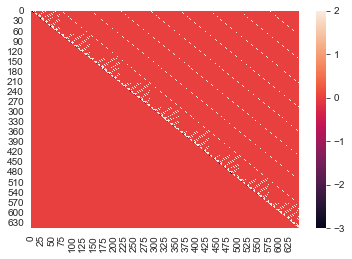

In [17]:
evaluate(Q)

In [18]:
# Just an explanation of why we used this to make the ids tuples for III
# For on-diagonal elements

x = [1,2,3,4]
lol = []

for _ in range(len(x)):
    for y in enumerate(x[_ + 0:_ + 1], ):
        lol.append((x[_], y[1]))
lol

[(1, 1), (2, 2), (3, 3), (4, 4)]

In [19]:
# Just an explanation of why we used this to make the ids tuples for III
# For off-diagonal elements

x = [1,2,3,4]
lol = []

for _ in range(len(x)):
    for y in enumerate(x[_ + 1 :], ):
        lol.append((x[_], y[1]))
lol

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [20]:
test_num = 1
count = 0
with open(path + "SudoQtest" + str(test_num) + ".txt") as test_file:
    for x in range(9):
        for y in range(9):
            char = test_file.read(1)
            if char != "_" and char != "\n":
                count += 1
                z = int(char)
                if z != 9:
                    ID = unique_id(x,y,z)
                    Q_add(Q, ID, ID, add_value = -1 * inf)
                elif z == 9:
                    z = np.arange(8)
                    ones = np.ones(8)
                    x = ones * x
                    y = ones * y 
                    
                    IDS = unique_id(x,y,z)
                    Q_add(Q, IDS, IDS, add_value = inf)
            
print("Loaded the template into the QUBO formulation")
print("Count for the number of pre-filled numbers in the template: {}".format(count))

Loaded the template into the QUBO formulation
Count for the number of pre-filled numbers in the template: 58


The summation of QUBO Q Matrix elements is:  14456

The QUBO Matrix: 
[[-3  2  2 ...  0  0  0]
 [ 0 -3  2 ...  0  0  0]
 [ 0  0 -3 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  2  2]
 [ 0  0  0 ...  0  1  2]
 [ 0  0  0 ...  0  0  1]]

Q is an upper triangular matrix: True



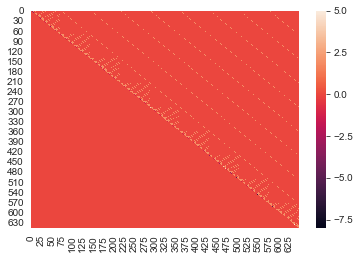

In [21]:
evaluate(Q)

In [22]:
# Save the QUBO Matrix to file and generate the .qubo file
# To be used only if you use qbsolv through CMD

Q = np.asarray(Q)
np.save( path + 'Q_matrix', Q)
target = 0; target = str(target) + " "           # target = 0 indicates topology of an unconstrained problem
maxDiagonals = np.shape(Q)[0]; maxDiagonals = str(maxDiagonals) + " "  #Indicates the maximum num of diagonals possible ~ equivalent to max no of qubits
nDiagonals = 0; nElements = 0

for _ in range(np.shape(Q)[0]):
    for __ in range(np.shape(Q)[0]):
        if Q[_][__] != 0:
            if _ == __:
                nDiagonals += 1
                nElements += 1
            else:
                nElements += 1
            
nDiagonals = str(nDiagonals) + " "
nElements = str(nElements) + " "


# Find the "nDiagonals" clauses and "nElements" clauses
nDiagonals_clauses = []; nElements_clauses = []
for _ in range(np.shape(Q)[0]):
    for __ in range(_, np.shape(Q)[0]):
        if Q[_][__] != 0:
            temp = [str(_) + " " + str(__) + " " + str(Q[_][__]) + "\n"]
            if _ == __:
                nDiagonals_clauses.append(temp[0])
            else:
                nElements_clauses.append(temp[0])
                
# Compiling the .qubo file
with open(path + "sudoQ.qubo", "w") as qubo_file:
    comment_str1 = ["c This is a QUBO file for solving Sudoku \n", "c  \n"]
    comment_str2 = ["c The program 'p' line follows \n"]
    p_str = ["p qubo " + target + maxDiagonals + nDiagonals + nElements + "\n"]
    comment_str3 = ["c The nDiagonals on diagonal couplers follow \n"]
    nDiagonals_couplers = nDiagonals_clauses
    comment_str4 = ["c The nElements off diagonal couplers follow \n"]
    nElements_couplers = nElements_clauses
    
    qubo_file.writelines(comment_str1)
    qubo_file.writelines(comment_str2)
    qubo_file.writelines(p_str)
    qubo_file.writelines(comment_str3)
    qubo_file.writelines(nDiagonals_couplers)
    qubo_file.writelines(comment_str4)
    qubo_file.writelines(nElements_couplers)



In [23]:
# Compiling the qubo dictionary according to the qbsolv python package's requirement

nDiagonals_clauses = {}; nElements_clauses = {}
for _ in range(np.shape(Q)[0]):
    for __ in range(_, np.shape(Q)[0]):
        if Q[_][__] != 0:
            if _ == __:
                nDiagonals_clauses[(_, __)] = Q[_][__]
            else:
                nElements_clauses[(_, __)] = Q[_][__]
                
qubo = nDiagonals_clauses
qubo.update(nElements_clauses)

In [24]:
# Solving qubo, getting the solution

from dwave_qbsolv.qbsolv_binding import run_qbsolv, ENERGY_IMPACT, SOLUTION_DIVERSITY

samples, energies, counts = run_qbsolv(Q=qubo)
solution = samples[np.argmin(energies[:])]

how_many_qubits_are_1 = 0; ids = []
for _ in range(len(solution)):
    how_many_qubits_are_1 += solution[_]
    ids.append(_)
print(how_many_qubits_are_1)

xs, ys, zs = xyz_from_id(ids, as_tuple = False)

68


In [25]:
# Compiling the qubo dictionary according to the qbsolv python package's requirement

nDiagonals_clauses = {}; nElements_clauses = {}
for _ in range(np.shape(Q)[0]):
    for __ in range(_, np.shape(Q)[0]):
        if Q[_][__] != 0:
            if _ == __:
                nDiagonals_clauses[__] = Q[_][__]
            else:
                nElements_clauses[(_, __)] = Q[_][__]
######
######
######
response = QBSolv().sample_ising(nDiagonals_clauses, nElements_clauses)

voting = [ v for v in list(response.samples())[0].values() ]
for _ in range( 1, len(list(response.samples()))):
    list_values = [ v for v in list(response.samples())[_].values() ]
    voting = voting + list_values
voting

[1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -

In [26]:
values = [ v for v in list(response.samples())[0].values() ]

keys = [ v for v in list(response.samples())[0].keys() ]
keys = xyz_from_id(keys)

solution_x = keys[0]
solution_y = keys[1]
solution_z = keys[2]

In [28]:
# Ising sampler

import neal
sampler = neal.SimulatedAnnealingSampler()

response = sampler.sample_ising(nDiagonals_clauses, nElements_clauses)

In [30]:
response = response = QBSolv().sample_qubo(qubo)
list(response.samples())[0] == list(response.samples())[6]


False

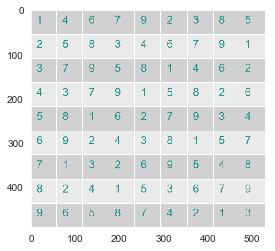

In [41]:
sudoku_solved = img.imread(location2 + '/' + name2)
plt.imshow(sudoku_solved)
plt.show()